In [1]:
from utils.data_handling import *
from utils.sensor_optimisation_gpy_sparse import *
from parameters import *
import GPy
import scipy.stats

import matplotlib.pyplot as plt
np.random.seed(101)

from sklearn.decomposition import TruncatedSVD

### Importing the Tracer Data to Select the Optimisation set S

In [2]:
parameters['i_end'] = 988
parameters['field_name'] = "Tracer"
parameters


{'i_start': 0,
 'i_end': 988,
 'crop': None,
 'field_name': 'Tracer',
 'cov_method': 'sample'}

In [3]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_988_None/loc_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/time_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/data_Tracer.pkl


### Working subset of the data : set S

In [4]:
S = working_subset(data_df, loc_df, nbins = (25,25,25), threshold_sum = 10**-2 )

The remaining number of points is :  57725


### Import the Field of interest for computing the optimisation : TracerBackground / Pressure

In [5]:
parameters['i_end'] = 988
parameters['field_name'] = "Tracer"
parameters


{'i_start': 0,
 'i_end': 988,
 'crop': None,
 'field_name': 'Tracer',
 'cov_method': 'sample'}

In [6]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_988_None/loc_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/time_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/data_Tracer.pkl


In [7]:
X = loc_df.values[S,:] #[I,:dim]
Z = data_df.values[S,:]#[:,t].reshape(-1,1) # [I,t].reshape(-1,1)
Z.shape

(57725, 989)

### Detrending Data : 
Plotting the data along each direction in order to see if there is a obvious trend. It seams that it is not the case. 

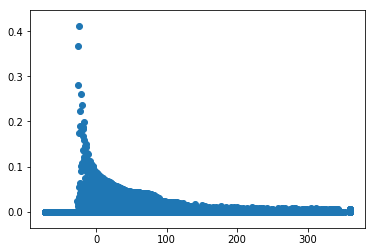

In [8]:
plt.scatter(X[:,0],Z[:,988])
#plt.scatter(X[:,1],Z)
#plt.scatter(X[:,2],Z)

Temporal Analysis : 

In [9]:
# Threshold bellow which everything is zero : 
thresh = 0.0001

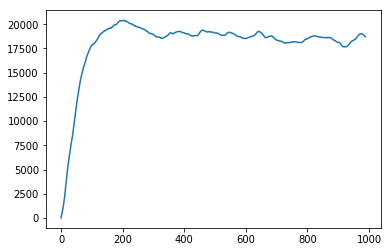

In [10]:
# plot of the non zero elements in function of the time 
plt.plot(np.sum(Z>=thresh,axis=0))

In [11]:
Z[Z<thresh] = 0
Z = Z[:,200:]
Z.shape

(57725, 789)

What should I do : 
- Cut the time at 200: ?
- replace the values bellow the threshold by 0 ? 


In [12]:
Z = (Z - Z.mean(axis=1,keepdims=True))

### TSVD : 


In [ ]:
Sample_cov = Z @ Z.T

In [39]:
y = np.zeros((10,10))
np.delete(y,[1,2],axis=0).shape

(8, 10)

In [82]:
y = 10
Z_y = Z[y,:]
Z_A = np.delete(Z[:1000,:],[y],axis=0)
Z_A.shape

(999, 989)

In [45]:
Z[1,:].reshape(1,-1).shape

(1, 789)

In [16]:
var_y = np.zeros(1000)
var_y_gp = np.zeros(1000)

tsvd = TruncatedSVD(n_components=50)
for y in tqdm.tqdm(range(1000)):
    Z_y = Z[y,:]
    Z_A = np.delete(Z[:100,:],[y],axis=0)
    Z_Atau = tsvd.fit_transform(Z_A.T ).T
    var_y[y] = Z_y.T @ Z_y -  Z_y.T @ Z_Atau.T @ np.linalg.inv(Z_Atau @ Z_Atau.T) @ Z_Atau @ Z_y
    #var_y_gp[y] = Z_y.T @ Z_y -  Z_y.T @ Z_A.T @ np.linalg.inv(Z_A @ Z_A.T) @ Z_A @ Z_y


100%|██████████| 1000/1000 [00:08<00:00, 112.92it/s]

In [18]:
var_y.min()

0.0

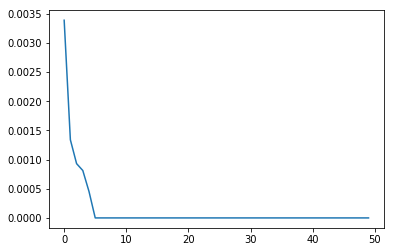

In [19]:
plt.plot(tsvd.singular_values_)

In [ ]:
eig = np.linalg.eigvalsh(Sample_cov)

In [ ]:
eig